In [37]:
import pandas as pd          
import numpy as np          # For mathematical calculations 
import matplotlib.pyplot as plt  # For plotting graphs 
from datetime import datetime    # To access datetime 
from pandas import Series        # To work on series 
%matplotlib inline 
import warnings                   # To ignore the warnings warnings.filterwarnings("ignore")

In [38]:
train=pd.read_csv("Train_SU63ISt.csv") 
test=pd.read_csv("Test_0qrQsBZ.csv")

In [39]:
train.head()


,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [40]:
train.columns


Index(['ID', 'Datetime', 'Count'], dtype='object')

In [41]:
train.describe()


,ID,Count
count,18288.000000,18288.000000
mean,9143.500000,138.958115
std,5279.435197,153.467461
min,0.000000,2.000000
25%,4571.750000,22.000000
50%,9143.500000,84.000000
75%,13715.250000,210.000000
max,18287.000000,1244.000000


In [42]:
train['Datetime'] = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
test['Datetime'] = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 

In [43]:
train.head()


,ID,Datetime,Count
0,0,2012-08-25 00:00:00,8
1,1,2012-08-25 01:00:00,2
2,2,2012-08-25 02:00:00,6
3,3,2012-08-25 03:00:00,2
4,4,2012-08-25 04:00:00,2


In [44]:
for i in (train, test):
    i['year']=i.Datetime.dt.year 
    i['month']=i.Datetime.dt.month 
    i['day']=i.Datetime.dt.day
    i['Hour']=i.Datetime.dt.hour 

In [45]:
train.head()

,ID,Datetime,Count,year,month,day,Hour
0,0,2012-08-25 00:00:00,8,2012,8,25,0
1,1,2012-08-25 01:00:00,2,2012,8,25,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2
3,3,2012-08-25 03:00:00,2,2012,8,25,3
4,4,2012-08-25 04:00:00,2,2012,8,25,4


In [46]:
train['dayofweek']=train['Datetime'].dt.dayofweek
test['dayofweek']=test['Datetime'].dt.dayofweek


In [47]:
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0 
temp2 = train['Datetime'].apply(applyer) 
temp = test['Datetime'].apply(applyer) 
train['weekend']=temp2
test['weekend']=temp

In [48]:

train.head()


,ID,Datetime,Count,year,month,day,Hour,dayofweek,weekend
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [49]:
train.index = train['Datetime']
train.drop('ID',1)

,Datetime,Count,year,month,day,Hour,dayofweek,weekend
Datetime,,,,,,,,
2012-08-25 00:00:00,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,2012-08-25 04:00:00,2,2012,8,25,4,5,1
2012-08-25 05:00:00,2012-08-25 05:00:00,2,2012,8,25,5,5,1
2012-08-25 06:00:00,2012-08-25 06:00:00,2,2012,8,25,6,5,1
2012-08-25 07:00:00,2012-08-25 07:00:00,2,2012,8,25,7,5,1
2012-08-25 08:00:00,2012-08-25 08:00:00,6,2012,8,25,8,5,1


In [50]:
ts = train['Count'] 

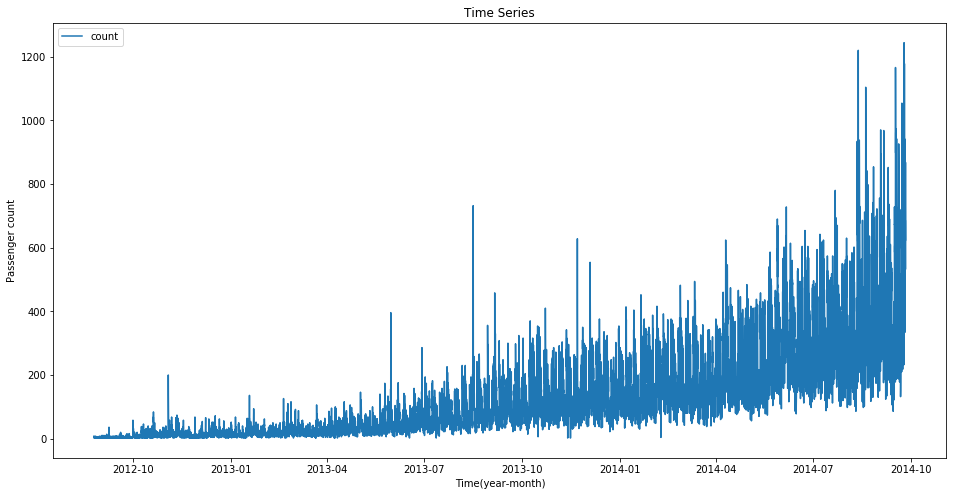

In [51]:
plt.figure(figsize=(16,8))
plt.plot(ts,label='count')
plt.title('Time Series') 
plt.xlabel("Time(year-month)") 
plt.ylabel("Passenger count") 
plt.legend()

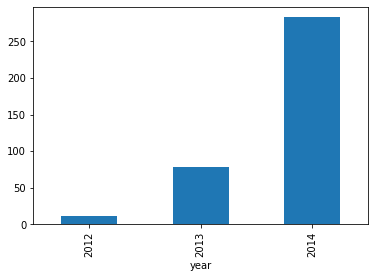

In [52]:
train.groupby('year')['Count'].mean().plot.bar()



1.Hence traffic increases with years (tick)

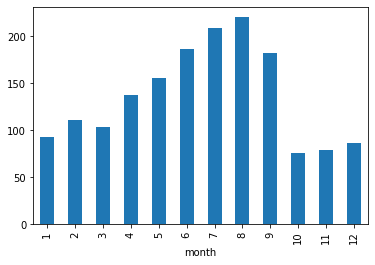

In [53]:
train.groupby('month')['Count'].mean().plot.bar()

train.groupby(['year','month'])['Count'].mean().plot()

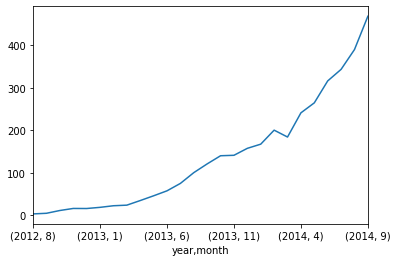

In [54]:
train.groupby(['year','month'])['Count'].mean().plot()

In [55]:
df =train.groupby('year')['month'].nunique()
df

year
2012     5
2013    12
2014     9
Name: month, dtype: int64

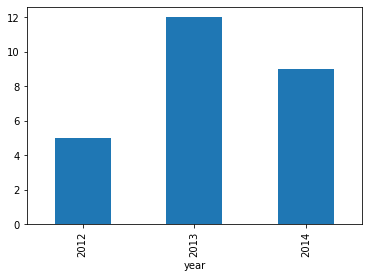

In [56]:
df.plot.bar()


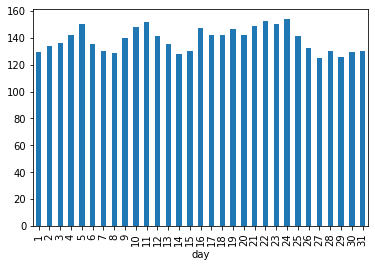

In [57]:
train.groupby('day')['Count'].mean().plot.bar()

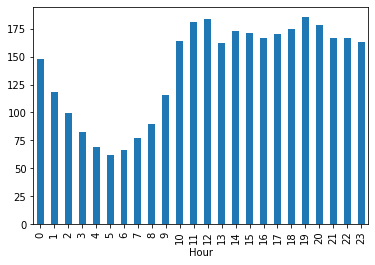

In [58]:
train.groupby('Hour')['Count'].mean().plot.bar()

It can be inferred that the peak traffic is at 7 PM and then we see a decreasing trend till 5 AM. After that the passenger count starts increasing again and peaks again between 11AM and 12 Noon.

LET us see the pattern for weekdays and weekends

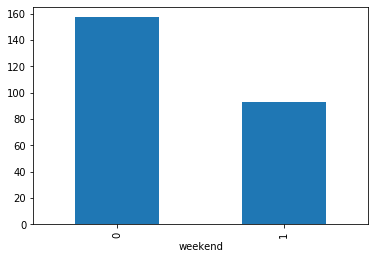

In [59]:
train.groupby('weekend')['Count'].mean().plot.bar()


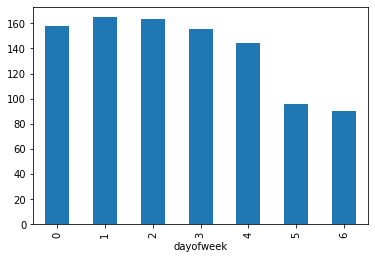

In [60]:
train.groupby('dayofweek')['Count'].mean().plot.bar()

In [61]:
train.drop('ID',1)

,Datetime,Count,year,month,day,Hour,dayofweek,weekend
Datetime,,,,,,,,
2012-08-25 00:00:00,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,2012-08-25 04:00:00,2,2012,8,25,4,5,1
2012-08-25 05:00:00,2012-08-25 05:00:00,2,2012,8,25,5,5,1
2012-08-25 06:00:00,2012-08-25 06:00:00,2,2012,8,25,6,5,1
2012-08-25 07:00:00,2012-08-25 07:00:00,2,2012,8,25,7,5,1
2012-08-25 08:00:00,2012-08-25 08:00:00,6,2012,8,25,8,5,1


In [62]:
train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp 
train.index

C:\Users\Moni\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


DatetimeIndex(['2012-08-25 00:00:00', '2012-08-25 01:00:00',
               '2012-08-25 02:00:00', '2012-08-25 03:00:00',
               '2012-08-25 04:00:00', '2012-08-25 05:00:00',
               '2012-08-25 06:00:00', '2012-08-25 07:00:00',
               '2012-08-25 08:00:00', '2012-08-25 09:00:00',
               ...
               '2014-09-25 14:00:00', '2014-09-25 15:00:00',
               '2014-09-25 16:00:00', '2014-09-25 17:00:00',
               '2014-09-25 18:00:00', '2014-09-25 19:00:00',
               '2014-09-25 20:00:00', '2014-09-25 21:00:00',
               '2014-09-25 22:00:00', '2014-09-25 23:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=18288, freq=None)

In [63]:
# Hourly time series 
hourly = train.resample('H').mean() 
# Converting to daily mean 
daily = train.resample('D').mean() 
# Converting to weekly mean 
weekly = train.resample('W').mean() 
# Converting to monthly mean 
monthly = train.resample('M').mean()


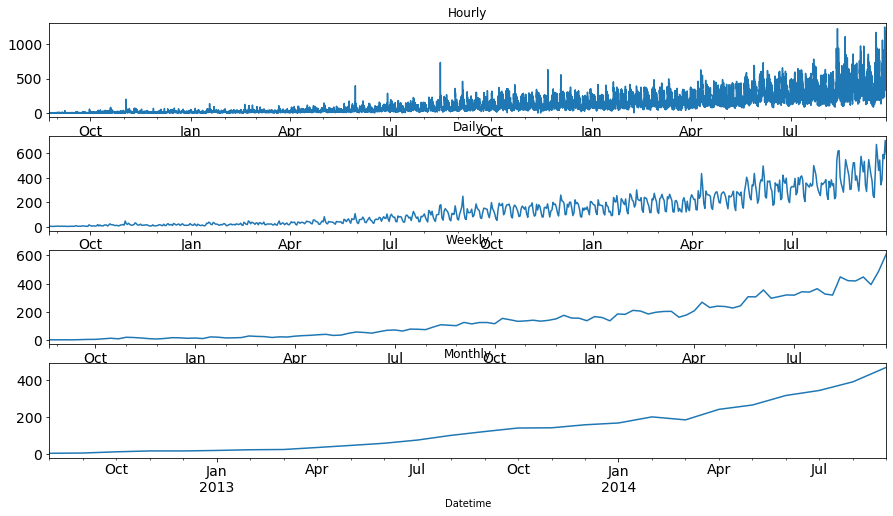

In [64]:
ig, axs = plt.subplots(4,1) 
hourly.Count.plot(figsize=(15,8), title= 'Hourly', fontsize=14, ax=axs[0])
daily.Count.plot(figsize=(15,8), title= 'Daily', fontsize=14, ax=axs[1])
weekly.Count.plot(figsize=(15,8), title= 'Weekly', fontsize=14, ax=axs[2])
monthly.Count.plot(figsize=(15,8), title= 'Monthly', fontsize=14, ax=axs[3]) 
plt.show()


In [73]:
test.head()

,ID,year,month,day,Hour,dayofweek,weekend
Datetime,,,,,,,
2014-09-26,18299.5,2014.0,9.0,26.0,11.5,4.0,0.0
2014-09-27,18323.5,2014.0,9.0,27.0,11.5,5.0,1.0
2014-09-28,18347.5,2014.0,9.0,28.0,11.5,6.0,1.0
2014-09-29,18371.5,2014.0,9.0,29.0,11.5,0.0,0.0
2014-09-30,18395.5,2014.0,9.0,30.0,11.5,1.0,0.0


In [74]:

test = test.resample('D').mean() 
train = train.resample('D').mean()



# Converting to daily mean 



Split into train and validation 


C:\Users\Moni\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\Moni\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


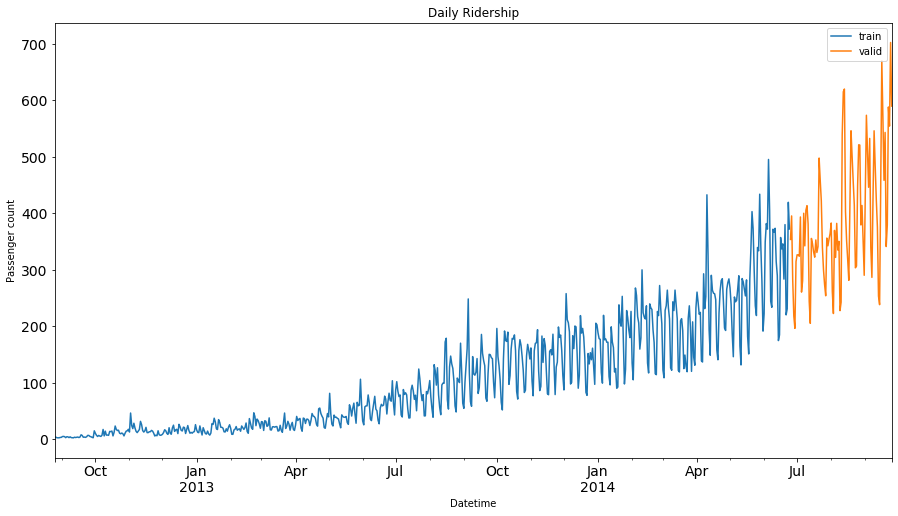

In [68]:
Train=train.ix['2012-08-25':'2014-06-24'] 
valid=train.ix['2014-06-25':'2014-09-25']
Train.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='train')
valid.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='valid')
plt.xlabel("Datetime")
plt.ylabel("Passenger count")
plt.legend(loc='best') 
plt.show()

HOLTS linear model(uses weighted average on trends and levels)

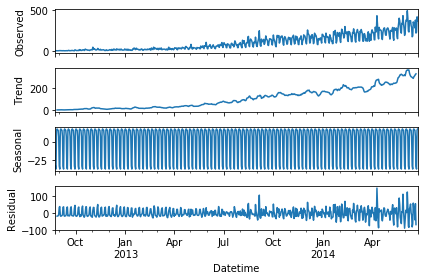

In [75]:
import statsmodels.api as sm 
sm.tsa.seasonal_decompose(Train.Count).plot() 
result = sm.tsa.stattools.adfuller(train.Count) 
plt.show()

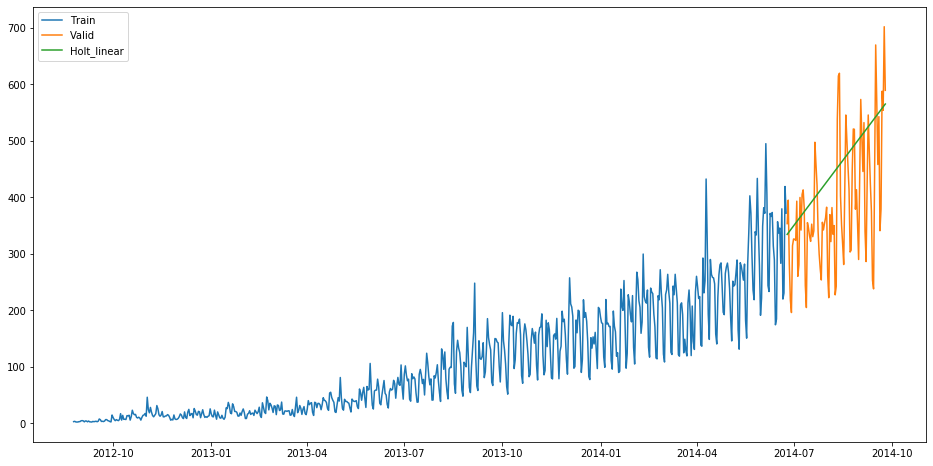

In [79]:
from statsmodels.tsa.holtwinters import Holt
y_hat_avg = valid.copy() 
fit1 = Holt(np.asarray(Train['Count'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(valid)) 
plt.figure(figsize=(16,8)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear') 
plt.legend(loc='best') 
plt.show()
